In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import xgboost
print(xgboost.__version__)

1.3.3


In [7]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label 
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, 
                                                    test_size = 0.2,
                                                    random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [40]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, \
precision_score, roc_auc_score

# from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
# pred_proba = rf_clf.predict_proba(X_test)
# pred = rf_clf.predict(X_test)
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_acu = roc_auc_score(y_test, pred_proba)
    f1 = f1_score(y_test, pred)
    print('오차행렬 : \n', confusion)
    print('정확도 : {:.3F},정밀도 : {:.3F}, 재현율 : {:.3F}, F1:{:.3F}, AUC :: {:.3F}'.format(accuracy,\
                                                                                     precision, \
                                                                                     recall, \
                                                                                     f1, roc_acu))

In [47]:
# 사이킷런 Wrapper XGBoost
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                            max_depth =3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, 
                eval_set=evals,eval_metric='logloss', verbose=True)#더 이상 개선될 여지가 없으면 조기중단
ws400_preds = xgb_wrapper.predict(X_test)
ws400_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]



[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [42]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬 : 
 [[35  2]
 [ 1 76]]
정확도 : 0.974,정밀도 : 0.974, 재현율 : 0.987, F1:0.981, AUC :: 0.995


In [43]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                            max_depth =3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                eval_set=evals,eval_metric='logloss', verbose=True)#더 이상 개선될 여지가 없으면 조기중단
ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [48]:
get_clf_eval(y_test, ws400_preds, ws400_preds_proba)

오차행렬 : 
 [[35  2]
 [ 1 76]]
정확도 : 0.974,정밀도 : 0.974, 재현율 : 0.987, F1:0.981, AUC :: 0.995


In [53]:
get_clf_eval(y_test,ws100_preds,ws100_preds_proba)

오차행렬 : 
 [[34  3]
 [ 1 76]]
정확도 : 0.965,정밀도 : 0.962, 재현율 : 0.987, F1:0.974, AUC :: 0.995


In [52]:
# sklearn wrapper 방식으로, 책에는 파이썬 방식이 있음 
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                            max_depth =3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_set=evals,eval_metric='logloss', verbose=True)#더 이상 개선될 여지가 없으면 조기중단
ws10_preds = xgb_wrapper.predict(X_test)
ws10_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,ws10_preds,ws10_preds_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

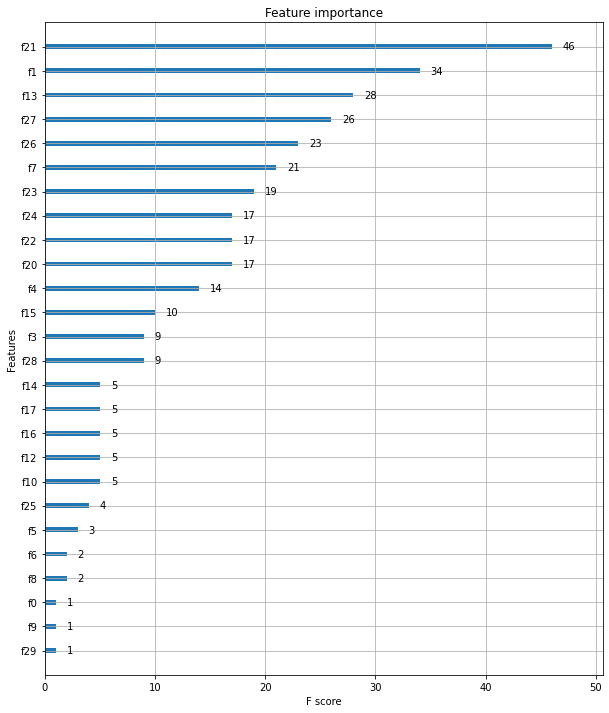

In [55]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

In [56]:
import lightgbm 
print(lightgbm.__version__)

3.1.1


In [57]:
from lightgbm import LGBMClassifier
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,
                verbose=True)

preds = lgbm_wrapper.predict(X_test)
preds_proba = lgbm_wrapper.predict_proba(X_test)[:,1]


[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [58]:
get_clf_eval(y_test, preds, preds_proba)

오차행렬 : 
 [[33  4]
 [ 1 76]]
정확도 : 0.956,정밀도 : 0.950, 재현율 : 0.987, F1:0.968, AUC :: 0.991


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

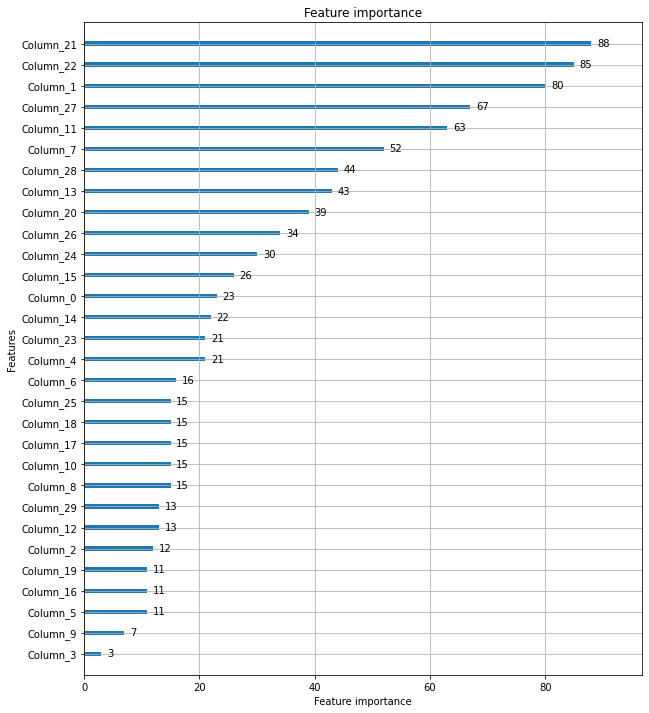

In [59]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax) 

#### 과제 : 캐글 산탄데르 고객 만족 예측
Q. 산탄데르 은행의 고객만족 예측 분석을 수행하세요.
- 370개의 피처로 주어진 데이터 세트 
- 클래스 레이블명은 target 1이 불만, 0은 만족
- 모델의 성능평가는 ROC_AUC
- 데이터는 https://www.kaggle.com/c/santander-customer-satisfaction/data


In [78]:
import pandas as pd
train = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/santander-customer-satisfaction/train.csv')
test = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/santander-customer-satisfaction/test.csv')

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [79]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [82]:
print(train['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [104]:
uns_cnt = train[train['TARGET']==1].TARGET.count()
total_cnt = uns_cnt.TARGET.count()
print(total_cnt)

AttributeError: 'numpy.int64' object has no attribute 'TARGET'

In [84]:
print(train.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [86]:
train['var3'].replace(-999999, 2, inplace=True)
train.drop('ID', axis=1, inplace=True)

In [87]:
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=156,
                                                   stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shpae: {}, 테스트 세트 shape {}'.format(X_train.shape, X_test.shape))

학습 세트 shpae: (60816, 369), 테스트 세트 shape (15204, 369)


In [105]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
lgbm_clf = LGBMClassifier(n_estimators=500,random_state=156)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
            verbose = True)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.813679	valid_0's binary_logloss: 0.160517
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.816247	valid_0's binary_logloss: 0.155845
[3]	valid_0's auc: 0.821718	valid_0's binary_logloss: 0.152429
[4]	valid_0's auc: 0.82338	valid_0's binary_logloss: 0.149831
[5]	valid_0's auc: 0.825588	valid_0's binary_logloss: 0.147763
[6]	valid_0's auc: 0.827015	valid_0's binary_logloss: 0.146103
[7]	valid_0's auc: 0.829829	valid_0's binary_logloss: 0.144603
[8]	valid_0's auc: 0.830974	valid_0's binary_logloss: 0.143448
[9]	valid_0's auc: 0.831217	valid_0's binary_logloss: 0.142542
[10]	valid_0's auc: 0.832593	valid_0's binary_logloss: 0.141662
[11]	valid_0's auc: 0.833085	valid_0's binary_logloss: 0.140963
[12]	valid_0's auc: 0.833945	valid_0's binary_logloss: 0.140352
[13]	valid_0's auc: 0.834582	valid_0's binary_logloss: 0.139701
[14]	valid_0's auc: 0.83615	valid_0's binary_logloss: 0.139273
[15]	valid_0's auc: 0.837207	valid_0's binary_logloss

[134]	valid_0's auc: 0.836864	valid_0's binary_logloss: 0.137677
[135]	valid_0's auc: 0.836687	valid_0's binary_logloss: 0.13774
[136]	valid_0's auc: 0.836623	valid_0's binary_logloss: 0.137763
[137]	valid_0's auc: 0.83634	valid_0's binary_logloss: 0.137828
[138]	valid_0's auc: 0.83617	valid_0's binary_logloss: 0.137894
[139]	valid_0's auc: 0.835863	valid_0's binary_logloss: 0.137954
[140]	valid_0's auc: 0.835794	valid_0's binary_logloss: 0.137998
[141]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.137991
[142]	valid_0's auc: 0.836064	valid_0's binary_logloss: 0.137982
[143]	valid_0's auc: 0.835941	valid_0's binary_logloss: 0.138022
[144]	valid_0's auc: 0.835744	valid_0's binary_logloss: 0.138098
[145]	valid_0's auc: 0.835683	valid_0's binary_logloss: 0.138106
[146]	valid_0's auc: 0.835489	valid_0's binary_logloss: 0.138148
[147]	valid_0's auc: 0.835503	valid_0's binary_logloss: 0.138174
[148]	valid_0's auc: 0.835406	valid_0's binary_logloss: 0.138202
[149]	valid_0's auc: 0.835204

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

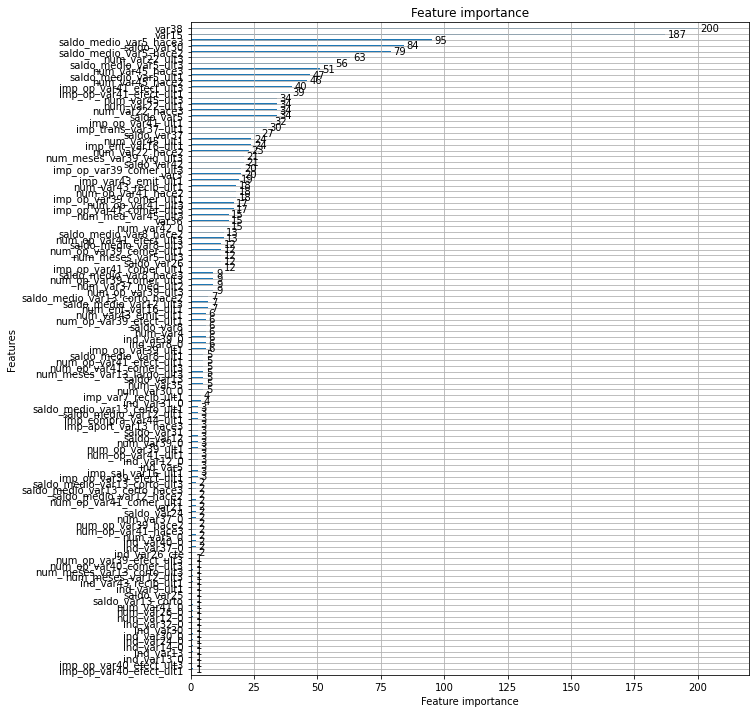

In [94]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax) 

In [99]:
from sklearn.model_selection import GridSearchCV
lgbm_clf = LGBMClassifier(n_estimator=200)

params = {'num_leaves':[32,64],
        'max_depth':[128,160],
        'min_child_samples':[60,100],
        'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", 
          eval_set=[(X_train, y_train),(X_test,y_test)])

print('GridSearchCV 최적의 파라미터 ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.826422	valid_0's binary_logloss: 0.157408	valid_1's auc: 0.812381	valid_1's binary_logloss: 0.160296
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832908	valid_0's binary_logloss: 0.152159	valid_1's auc: 0.818258	valid_1's binary_logloss: 0.155693
[3]	valid_0's auc: 0.837226	valid_0's binary_logloss: 0.148201	valid_1's auc: 0.82399	valid_1's binary_logloss: 0.152162
[4]	valid_0's auc: 0.841208	valid_0's binary_logloss: 0.145257	valid_1's auc: 0.824903	valid_1's binary_logloss: 0.149604
[5]	valid_0's auc: 0.844895	valid_0's binary_logloss: 0.142855	valid_1's auc: 0.827201	valid_1's binary_logloss: 0.147704
[6]	valid_0's auc: 0.846969	valid_0's binary_logloss: 0.140783	valid_1's auc: 0.828908	valid_1's binary_logloss: 0.146049
[7]	valid_0's auc: 0.848043	valid_0's binary_logloss: 0.139035	valid_1's auc: 0.828878	valid_1's binary_logloss: 0.144685
[8]	valid_0's auc: 0.849378	valid_0's binary_logloss: 0.137589	valid_1's auc: 0.828333

[11]	valid_0's auc: 0.855157	valid_0's binary_logloss: 0.133763	valid_1's auc: 0.830904	valid_1's binary_logloss: 0.140924
[12]	valid_0's auc: 0.857111	valid_0's binary_logloss: 0.132862	valid_1's auc: 0.832132	valid_1's binary_logloss: 0.140371
[13]	valid_0's auc: 0.858842	valid_0's binary_logloss: 0.131994	valid_1's auc: 0.833265	valid_1's binary_logloss: 0.139725
[14]	valid_0's auc: 0.860094	valid_0's binary_logloss: 0.131231	valid_1's auc: 0.83458	valid_1's binary_logloss: 0.139172
[15]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.130581	valid_1's auc: 0.834322	valid_1's binary_logloss: 0.138813
[16]	valid_0's auc: 0.862146	valid_0's binary_logloss: 0.129976	valid_1's auc: 0.835301	valid_1's binary_logloss: 0.138447
[17]	valid_0's auc: 0.862872	valid_0's binary_logloss: 0.129468	valid_1's auc: 0.835948	valid_1's binary_logloss: 0.138112
[18]	valid_0's auc: 0.864141	valid_0's binary_logloss: 0.128919	valid_1's auc: 0.83707	valid_1's binary_logloss: 0.137722
[19]	valid_0's auc

[19]	valid_0's auc: 0.863156	valid_0's binary_logloss: 0.128667	valid_1's auc: 0.83402	valid_1's binary_logloss: 0.138148
[20]	valid_0's auc: 0.865001	valid_0's binary_logloss: 0.128146	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.138035
[21]	valid_0's auc: 0.865755	valid_0's binary_logloss: 0.127731	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.137883
[22]	valid_0's auc: 0.866983	valid_0's binary_logloss: 0.127321	valid_1's auc: 0.833381	valid_1's binary_logloss: 0.137766
[23]	valid_0's auc: 0.867592	valid_0's binary_logloss: 0.126972	valid_1's auc: 0.83435	valid_1's binary_logloss: 0.137574
[24]	valid_0's auc: 0.868369	valid_0's binary_logloss: 0.126617	valid_1's auc: 0.834762	valid_1's binary_logloss: 0.137408
[25]	valid_0's auc: 0.869688	valid_0's binary_logloss: 0.126254	valid_1's auc: 0.8356	valid_1's binary_logloss: 0.137229
[26]	valid_0's auc: 0.870379	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.137061
[27]	valid_0's auc: 

[20]	valid_0's auc: 0.865422	valid_0's binary_logloss: 0.128435	valid_1's auc: 0.834657	valid_1's binary_logloss: 0.137993
[21]	valid_0's auc: 0.866324	valid_0's binary_logloss: 0.127971	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.137877
[22]	valid_0's auc: 0.867617	valid_0's binary_logloss: 0.127508	valid_1's auc: 0.835183	valid_1's binary_logloss: 0.137709
[23]	valid_0's auc: 0.868704	valid_0's binary_logloss: 0.127077	valid_1's auc: 0.835214	valid_1's binary_logloss: 0.137612
[24]	valid_0's auc: 0.869567	valid_0's binary_logloss: 0.126698	valid_1's auc: 0.83558	valid_1's binary_logloss: 0.137505
[25]	valid_0's auc: 0.870411	valid_0's binary_logloss: 0.126321	valid_1's auc: 0.835416	valid_1's binary_logloss: 0.137476
[26]	valid_0's auc: 0.871329	valid_0's binary_logloss: 0.125972	valid_1's auc: 0.835866	valid_1's binary_logloss: 0.137325
[27]	valid_0's auc: 0.872673	valid_0's binary_logloss: 0.125588	valid_1's auc: 0.835071	valid_1's binary_logloss: 0.137341
[28]	valid_0's au

[33]	valid_0's auc: 0.876915	valid_0's binary_logloss: 0.123724	valid_1's auc: 0.838797	valid_1's binary_logloss: 0.136248
[34]	valid_0's auc: 0.877629	valid_0's binary_logloss: 0.12343	valid_1's auc: 0.839049	valid_1's binary_logloss: 0.13622
[35]	valid_0's auc: 0.878096	valid_0's binary_logloss: 0.123195	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.136247
[36]	valid_0's auc: 0.878914	valid_0's binary_logloss: 0.122891	valid_1's auc: 0.83872	valid_1's binary_logloss: 0.136279
[37]	valid_0's auc: 0.879476	valid_0's binary_logloss: 0.122618	valid_1's auc: 0.838478	valid_1's binary_logloss: 0.136269
[38]	valid_0's auc: 0.87999	valid_0's binary_logloss: 0.122381	valid_1's auc: 0.838633	valid_1's binary_logloss: 0.13623
[39]	valid_0's auc: 0.880508	valid_0's binary_logloss: 0.122136	valid_1's auc: 0.838966	valid_1's binary_logloss: 0.136202
[40]	valid_0's auc: 0.881185	valid_0's binary_logloss: 0.121907	valid_1's auc: 0.839036	valid_1's binary_logloss: 0.136195
[41]	valid_0's auc: 0

[38]	valid_0's auc: 0.878335	valid_0's binary_logloss: 0.122711	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.136857
[39]	valid_0's auc: 0.879152	valid_0's binary_logloss: 0.122467	valid_1's auc: 0.835901	valid_1's binary_logloss: 0.136934
[40]	valid_0's auc: 0.879613	valid_0's binary_logloss: 0.122254	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.136871
[41]	valid_0's auc: 0.880427	valid_0's binary_logloss: 0.12198	valid_1's auc: 0.836702	valid_1's binary_logloss: 0.136841
[42]	valid_0's auc: 0.880756	valid_0's binary_logloss: 0.121822	valid_1's auc: 0.836855	valid_1's binary_logloss: 0.136823
[43]	valid_0's auc: 0.881354	valid_0's binary_logloss: 0.121609	valid_1's auc: 0.836838	valid_1's binary_logloss: 0.136835
[44]	valid_0's auc: 0.881926	valid_0's binary_logloss: 0.121395	valid_1's auc: 0.836576	valid_1's binary_logloss: 0.136909
[45]	valid_0's auc: 0.882373	valid_0's binary_logloss: 0.121189	valid_1's auc: 0.836627	valid_1's binary_logloss: 0.136856
[46]	valid_0's auc:

[31]	valid_0's auc: 0.893491	valid_0's binary_logloss: 0.118154	valid_1's auc: 0.829388	valid_1's binary_logloss: 0.138496
[32]	valid_0's auc: 0.894573	valid_0's binary_logloss: 0.117704	valid_1's auc: 0.829446	valid_1's binary_logloss: 0.138483
[33]	valid_0's auc: 0.895555	valid_0's binary_logloss: 0.117325	valid_1's auc: 0.829501	valid_1's binary_logloss: 0.138464
[34]	valid_0's auc: 0.896015	valid_0's binary_logloss: 0.116939	valid_1's auc: 0.829912	valid_1's binary_logloss: 0.13844
[35]	valid_0's auc: 0.896933	valid_0's binary_logloss: 0.116545	valid_1's auc: 0.830023	valid_1's binary_logloss: 0.138399
[36]	valid_0's auc: 0.897508	valid_0's binary_logloss: 0.116227	valid_1's auc: 0.830756	valid_1's binary_logloss: 0.138268
[37]	valid_0's auc: 0.897961	valid_0's binary_logloss: 0.115909	valid_1's auc: 0.830281	valid_1's binary_logloss: 0.138429
[38]	valid_0's auc: 0.898443	valid_0's binary_logloss: 0.115562	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.138361
[39]	valid_0's au

[34]	valid_0's auc: 0.895043	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.833173	valid_1's binary_logloss: 0.137331
[35]	valid_0's auc: 0.895996	valid_0's binary_logloss: 0.116235	valid_1's auc: 0.833623	valid_1's binary_logloss: 0.137301
[36]	valid_0's auc: 0.896696	valid_0's binary_logloss: 0.115898	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.137249
[37]	valid_0's auc: 0.897822	valid_0's binary_logloss: 0.115574	valid_1's auc: 0.833663	valid_1's binary_logloss: 0.137281
[38]	valid_0's auc: 0.898323	valid_0's binary_logloss: 0.115248	valid_1's auc: 0.834	valid_1's binary_logloss: 0.137278
[39]	valid_0's auc: 0.899139	valid_0's binary_logloss: 0.114882	valid_1's auc: 0.833942	valid_1's binary_logloss: 0.137311
[40]	valid_0's auc: 0.899691	valid_0's binary_logloss: 0.11455	valid_1's auc: 0.833929	valid_1's binary_logloss: 0.137348
[41]	valid_0's auc: 0.900388	valid_0's binary_logloss: 0.114248	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.137366
[42]	valid_0's auc: 0

[38]	valid_0's auc: 0.897331	valid_0's binary_logloss: 0.115323	valid_1's auc: 0.831861	valid_1's binary_logloss: 0.138022
[39]	valid_0's auc: 0.897816	valid_0's binary_logloss: 0.115042	valid_1's auc: 0.831188	valid_1's binary_logloss: 0.138236
[40]	valid_0's auc: 0.898977	valid_0's binary_logloss: 0.114655	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.138271
[41]	valid_0's auc: 0.89939	valid_0's binary_logloss: 0.114355	valid_1's auc: 0.830627	valid_1's binary_logloss: 0.138415
[42]	valid_0's auc: 0.899975	valid_0's binary_logloss: 0.114014	valid_1's auc: 0.830647	valid_1's binary_logloss: 0.138424
[43]	valid_0's auc: 0.900553	valid_0's binary_logloss: 0.113715	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.138487
[44]	valid_0's auc: 0.901248	valid_0's binary_logloss: 0.113445	valid_1's auc: 0.830019	valid_1's binary_logloss: 0.138591
[45]	valid_0's auc: 0.902034	valid_0's binary_logloss: 0.11318	valid_1's auc: 0.82988	valid_1's binary_logloss: 0.138632
[46]	valid_0's auc:

[53]	valid_0's auc: 0.90729	valid_0's binary_logloss: 0.111362	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.139232
[54]	valid_0's auc: 0.907819	valid_0's binary_logloss: 0.111097	valid_1's auc: 0.82899	valid_1's binary_logloss: 0.139256
[55]	valid_0's auc: 0.908075	valid_0's binary_logloss: 0.110868	valid_1's auc: 0.828818	valid_1's binary_logloss: 0.139359
[56]	valid_0's auc: 0.908386	valid_0's binary_logloss: 0.110648	valid_1's auc: 0.82859	valid_1's binary_logloss: 0.139419
[57]	valid_0's auc: 0.909072	valid_0's binary_logloss: 0.110349	valid_1's auc: 0.828948	valid_1's binary_logloss: 0.139372
[58]	valid_0's auc: 0.909444	valid_0's binary_logloss: 0.110112	valid_1's auc: 0.828612	valid_1's binary_logloss: 0.139478
[59]	valid_0's auc: 0.909691	valid_0's binary_logloss: 0.109877	valid_1's auc: 0.828615	valid_1's binary_logloss: 0.139519
[60]	valid_0's auc: 0.909856	valid_0's binary_logloss: 0.109664	valid_1's auc: 0.828279	valid_1's binary_logloss: 0.139616
[61]	valid_0's auc:

[62]	valid_0's auc: 0.908384	valid_0's binary_logloss: 0.109238	valid_1's auc: 0.831263	valid_1's binary_logloss: 0.138593
[63]	valid_0's auc: 0.908578	valid_0's binary_logloss: 0.109059	valid_1's auc: 0.830834	valid_1's binary_logloss: 0.138655
[64]	valid_0's auc: 0.908766	valid_0's binary_logloss: 0.108873	valid_1's auc: 0.830656	valid_1's binary_logloss: 0.138732
[65]	valid_0's auc: 0.908988	valid_0's binary_logloss: 0.10869	valid_1's auc: 0.830849	valid_1's binary_logloss: 0.13871
[66]	valid_0's auc: 0.909315	valid_0's binary_logloss: 0.108553	valid_1's auc: 0.83085	valid_1's binary_logloss: 0.138769
Early stopping, best iteration is:
[36]	valid_0's auc: 0.896696	valid_0's binary_logloss: 0.115898	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.137249
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832758	valid_0's binary_logloss: 0.156619	valid_1's auc: 0.811844	valid_1's binary_logloss: 0.160446
Training until validation scores don't improve for 30 ro

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823777	valid_0's binary_logloss: 0.157597	valid_1's auc: 0.817071	valid_1's binary_logloss: 0.160418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832824	valid_0's binary_logloss: 0.152366	valid_1's auc: 0.822725	valid_1's binary_logloss: 0.155567
[3]	valid_0's auc: 0.837856	valid_0's binary_logloss: 0.14853	valid_1's auc: 0.825203	valid_1's binary_logloss: 0.152153
[4]	valid_0's auc: 0.841138	valid_0's binary_logloss: 0.145505	valid_1's auc: 0.82684	valid_1's binary_logloss: 0.149575
[5]	valid_0's auc: 0.844587	valid_0's binary_logloss: 0.143118	valid_1's auc: 0.829136	valid_1's binary_logloss: 0.147537
[6]	valid_0's auc: 0.84663	valid_0's binary_logloss: 0.141077	valid_1's auc: 0.829753	valid_1's binary_logloss: 0.145914
[7]	valid_0's auc: 0.848085	valid_0's binary_logloss: 0.139358	valid_1's auc: 0.830127	valid_1's binary_logloss: 0.14457
[8]	valid_0's auc: 0.849096	valid_0's

[69]	valid_0's auc: 0.891885	valid_0's binary_logloss: 0.117862	valid_1's auc: 0.836047	valid_1's binary_logloss: 0.13737
[70]	valid_0's auc: 0.892182	valid_0's binary_logloss: 0.117688	valid_1's auc: 0.835984	valid_1's binary_logloss: 0.137398
[71]	valid_0's auc: 0.892384	valid_0's binary_logloss: 0.117556	valid_1's auc: 0.835802	valid_1's binary_logloss: 0.137405
[72]	valid_0's auc: 0.892477	valid_0's binary_logloss: 0.117457	valid_1's auc: 0.835832	valid_1's binary_logloss: 0.137402
[73]	valid_0's auc: 0.892899	valid_0's binary_logloss: 0.117262	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137353
[74]	valid_0's auc: 0.893219	valid_0's binary_logloss: 0.11711	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.137342
[75]	valid_0's auc: 0.893385	valid_0's binary_logloss: 0.117008	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.137427
[76]	valid_0's auc: 0.893675	valid_0's binary_logloss: 0.11686	valid_1's auc: 0.835861	valid_1's binary_logloss: 0.137439
[77]	valid_0's auc: 0

[62]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118967	valid_1's auc: 0.837493	valid_1's binary_logloss: 0.136561
[63]	valid_0's auc: 0.889222	valid_0's binary_logloss: 0.118838	valid_1's auc: 0.837224	valid_1's binary_logloss: 0.136629
[64]	valid_0's auc: 0.889467	valid_0's binary_logloss: 0.118683	valid_1's auc: 0.836985	valid_1's binary_logloss: 0.136684
[65]	valid_0's auc: 0.889827	valid_0's binary_logloss: 0.11852	valid_1's auc: 0.836842	valid_1's binary_logloss: 0.136701
[66]	valid_0's auc: 0.89034	valid_0's binary_logloss: 0.118397	valid_1's auc: 0.836846	valid_1's binary_logloss: 0.136698
[67]	valid_0's auc: 0.890742	valid_0's binary_logloss: 0.118253	valid_1's auc: 0.836759	valid_1's binary_logloss: 0.136717
[68]	valid_0's auc: 0.891003	valid_0's binary_logloss: 0.118117	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.136705
[69]	valid_0's auc: 0.891261	valid_0's binary_logloss: 0.117974	valid_1's auc: 0.836841	valid_1's binary_logloss: 0.136704
Early stopping, bes

[62]	valid_0's auc: 0.888314	valid_0's binary_logloss: 0.119137	valid_1's auc: 0.836103	valid_1's binary_logloss: 0.136921
[63]	valid_0's auc: 0.888586	valid_0's binary_logloss: 0.118966	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.136934
[64]	valid_0's auc: 0.889014	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.835954	valid_1's binary_logloss: 0.136937
[65]	valid_0's auc: 0.889495	valid_0's binary_logloss: 0.118636	valid_1's auc: 0.83585	valid_1's binary_logloss: 0.136957
[66]	valid_0's auc: 0.889827	valid_0's binary_logloss: 0.118488	valid_1's auc: 0.836008	valid_1's binary_logloss: 0.136946
[67]	valid_0's auc: 0.890238	valid_0's binary_logloss: 0.118305	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.136956
[68]	valid_0's auc: 0.890494	valid_0's binary_logloss: 0.118169	valid_1's auc: 0.835744	valid_1's binary_logloss: 0.137024
[69]	valid_0's auc: 0.890797	valid_0's binary_logloss: 0.118035	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.136981
[70]	valid_0's au

[68]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.118029	valid_1's auc: 0.836316	valid_1's binary_logloss: 0.137272
[69]	valid_0's auc: 0.891885	valid_0's binary_logloss: 0.117862	valid_1's auc: 0.836047	valid_1's binary_logloss: 0.13737
[70]	valid_0's auc: 0.892182	valid_0's binary_logloss: 0.117688	valid_1's auc: 0.835984	valid_1's binary_logloss: 0.137398
[71]	valid_0's auc: 0.892384	valid_0's binary_logloss: 0.117556	valid_1's auc: 0.835802	valid_1's binary_logloss: 0.137405
[72]	valid_0's auc: 0.892477	valid_0's binary_logloss: 0.117457	valid_1's auc: 0.835832	valid_1's binary_logloss: 0.137402
[73]	valid_0's auc: 0.892899	valid_0's binary_logloss: 0.117262	valid_1's auc: 0.836262	valid_1's binary_logloss: 0.137353
[74]	valid_0's auc: 0.893219	valid_0's binary_logloss: 0.11711	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.137342
[75]	valid_0's auc: 0.893385	valid_0's binary_logloss: 0.117008	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.137427
[76]	valid_0's auc: 

[63]	valid_0's auc: 0.889222	valid_0's binary_logloss: 0.118838	valid_1's auc: 0.837224	valid_1's binary_logloss: 0.136629
[64]	valid_0's auc: 0.889467	valid_0's binary_logloss: 0.118683	valid_1's auc: 0.836985	valid_1's binary_logloss: 0.136684
[65]	valid_0's auc: 0.889827	valid_0's binary_logloss: 0.11852	valid_1's auc: 0.836842	valid_1's binary_logloss: 0.136701
[66]	valid_0's auc: 0.89034	valid_0's binary_logloss: 0.118397	valid_1's auc: 0.836846	valid_1's binary_logloss: 0.136698
[67]	valid_0's auc: 0.890742	valid_0's binary_logloss: 0.118253	valid_1's auc: 0.836759	valid_1's binary_logloss: 0.136717
[68]	valid_0's auc: 0.891003	valid_0's binary_logloss: 0.118117	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.136705
[69]	valid_0's auc: 0.891261	valid_0's binary_logloss: 0.117974	valid_1's auc: 0.836841	valid_1's binary_logloss: 0.136704
Early stopping, best iteration is:
[39]	valid_0's auc: 0.878449	valid_0's binary_logloss: 0.123129	valid_1's auc: 0.839131	valid_1's binary_lo

[63]	valid_0's auc: 0.888586	valid_0's binary_logloss: 0.118966	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.136934
[64]	valid_0's auc: 0.889014	valid_0's binary_logloss: 0.118834	valid_1's auc: 0.835954	valid_1's binary_logloss: 0.136937
[65]	valid_0's auc: 0.889495	valid_0's binary_logloss: 0.118636	valid_1's auc: 0.83585	valid_1's binary_logloss: 0.136957
[66]	valid_0's auc: 0.889827	valid_0's binary_logloss: 0.118488	valid_1's auc: 0.836008	valid_1's binary_logloss: 0.136946
[67]	valid_0's auc: 0.890238	valid_0's binary_logloss: 0.118305	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.136956
[68]	valid_0's auc: 0.890494	valid_0's binary_logloss: 0.118169	valid_1's auc: 0.835744	valid_1's binary_logloss: 0.137024
[69]	valid_0's auc: 0.890797	valid_0's binary_logloss: 0.118035	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.136981
[70]	valid_0's auc: 0.891125	valid_0's binary_logloss: 0.117878	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.136994
Early stopping, b

[61]	valid_0's auc: 0.904374	valid_0's binary_logloss: 0.111206	valid_1's auc: 0.82994	valid_1's binary_logloss: 0.139416
[62]	valid_0's auc: 0.90459	valid_0's binary_logloss: 0.110999	valid_1's auc: 0.829764	valid_1's binary_logloss: 0.13948
[63]	valid_0's auc: 0.904866	valid_0's binary_logloss: 0.110796	valid_1's auc: 0.829758	valid_1's binary_logloss: 0.139527
[64]	valid_0's auc: 0.904858	valid_0's binary_logloss: 0.110669	valid_1's auc: 0.829144	valid_1's binary_logloss: 0.139695
Early stopping, best iteration is:
[34]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.118628	valid_1's auc: 0.833234	valid_1's binary_logloss: 0.138006
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.838605	valid_0's binary_logloss: 0.156601	valid_1's auc: 0.816799	valid_1's binary_logloss: 0.160317
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844004	valid_0's binary_logloss: 0.151002	valid_1's auc: 0.822474	valid_1's binary_logloss: 0.155

[15]	valid_0's auc: 0.869784	valid_0's binary_logloss: 0.128253	valid_1's auc: 0.830451	valid_1's binary_logloss: 0.139237
[16]	valid_0's auc: 0.870995	valid_0's binary_logloss: 0.127536	valid_1's auc: 0.83057	valid_1's binary_logloss: 0.138939
[17]	valid_0's auc: 0.872053	valid_0's binary_logloss: 0.12688	valid_1's auc: 0.831322	valid_1's binary_logloss: 0.138671
[18]	valid_0's auc: 0.873333	valid_0's binary_logloss: 0.126237	valid_1's auc: 0.83143	valid_1's binary_logloss: 0.138373
[19]	valid_0's auc: 0.875202	valid_0's binary_logloss: 0.12555	valid_1's auc: 0.830541	valid_1's binary_logloss: 0.1384
[20]	valid_0's auc: 0.876546	valid_0's binary_logloss: 0.124924	valid_1's auc: 0.830463	valid_1's binary_logloss: 0.138344
[21]	valid_0's auc: 0.87777	valid_0's binary_logloss: 0.124333	valid_1's auc: 0.829605	valid_1's binary_logloss: 0.138393
[22]	valid_0's auc: 0.879095	valid_0's binary_logloss: 0.123736	valid_1's auc: 0.829718	valid_1's binary_logloss: 0.138327
[23]	valid_0's auc: 0.8

[45]	valid_0's auc: 0.899328	valid_0's binary_logloss: 0.114894	valid_1's auc: 0.831286	valid_1's binary_logloss: 0.138573
[46]	valid_0's auc: 0.899654	valid_0's binary_logloss: 0.114612	valid_1's auc: 0.830891	valid_1's binary_logloss: 0.138676
[47]	valid_0's auc: 0.900096	valid_0's binary_logloss: 0.114335	valid_1's auc: 0.830536	valid_1's binary_logloss: 0.138746
[48]	valid_0's auc: 0.900394	valid_0's binary_logloss: 0.11406	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.138839
[49]	valid_0's auc: 0.900894	valid_0's binary_logloss: 0.113779	valid_1's auc: 0.83001	valid_1's binary_logloss: 0.138954
[50]	valid_0's auc: 0.901142	valid_0's binary_logloss: 0.113535	valid_1's auc: 0.830105	valid_1's binary_logloss: 0.138981
[51]	valid_0's auc: 0.901675	valid_0's binary_logloss: 0.113262	valid_1's auc: 0.830039	valid_1's binary_logloss: 0.139039
[52]	valid_0's auc: 0.902208	valid_0's binary_logloss: 0.112993	valid_1's auc: 0.830325	valid_1's binary_logloss: 0.139026
[53]	valid_0's auc

[47]	valid_0's auc: 0.90095	valid_0's binary_logloss: 0.114013	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.137237
[48]	valid_0's auc: 0.901398	valid_0's binary_logloss: 0.113773	valid_1's auc: 0.835073	valid_1's binary_logloss: 0.137268
[49]	valid_0's auc: 0.901819	valid_0's binary_logloss: 0.113486	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.137311
[50]	valid_0's auc: 0.902012	valid_0's binary_logloss: 0.113256	valid_1's auc: 0.835172	valid_1's binary_logloss: 0.13731
Early stopping, best iteration is:
[20]	valid_0's auc: 0.878625	valid_0's binary_logloss: 0.124625	valid_1's auc: 0.836309	valid_1's binary_logloss: 0.137102
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.832039	valid_0's binary_logloss: 0.156916	valid_1's auc: 0.811492	valid_1's binary_logloss: 0.160383
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844113	valid_0's binary_logloss: 0.151107	valid_1's auc: 0.823318	valid_1's binary_logloss: 0.15

[31]	valid_0's auc: 0.875901	valid_0's binary_logloss: 0.124379	valid_1's auc: 0.834558	valid_1's binary_logloss: 0.137159
[32]	valid_0's auc: 0.8766	valid_0's binary_logloss: 0.12413	valid_1's auc: 0.834597	valid_1's binary_logloss: 0.137134
[33]	valid_0's auc: 0.877161	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.834361	valid_1's binary_logloss: 0.137156
[34]	valid_0's auc: 0.877609	valid_0's binary_logloss: 0.123634	valid_1's auc: 0.834116	valid_1's binary_logloss: 0.137203
[35]	valid_0's auc: 0.878253	valid_0's binary_logloss: 0.123353	valid_1's auc: 0.834468	valid_1's binary_logloss: 0.137182
[36]	valid_0's auc: 0.879612	valid_0's binary_logloss: 0.123035	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.137237
[37]	valid_0's auc: 0.88068	valid_0's binary_logloss: 0.122688	valid_1's auc: 0.834488	valid_1's binary_logloss: 0.137208
[38]	valid_0's auc: 0.881034	valid_0's binary_logloss: 0.122477	valid_1's auc: 0.834521	valid_1's binary_logloss: 0.137205
[39]	valid_0's auc: 

[46]	valid_0's auc: 0.884804	valid_0's binary_logloss: 0.120634	valid_1's auc: 0.838805	valid_1's binary_logloss: 0.136124
[47]	valid_0's auc: 0.885296	valid_0's binary_logloss: 0.120419	valid_1's auc: 0.838793	valid_1's binary_logloss: 0.136124
[48]	valid_0's auc: 0.885926	valid_0's binary_logloss: 0.120206	valid_1's auc: 0.838422	valid_1's binary_logloss: 0.136235
[49]	valid_0's auc: 0.886258	valid_0's binary_logloss: 0.120052	valid_1's auc: 0.838116	valid_1's binary_logloss: 0.136303
[50]	valid_0's auc: 0.88662	valid_0's binary_logloss: 0.119859	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.136317
[51]	valid_0's auc: 0.887167	valid_0's binary_logloss: 0.11968	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.136325
[52]	valid_0's auc: 0.887857	valid_0's binary_logloss: 0.119444	valid_1's auc: 0.838371	valid_1's binary_logloss: 0.136269
[53]	valid_0's auc: 0.888091	valid_0's binary_logloss: 0.119267	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.136287
[54]	valid_0's auc

[58]	valid_0's auc: 0.888385	valid_0's binary_logloss: 0.11871	valid_1's auc: 0.836475	valid_1's binary_logloss: 0.13697
[59]	valid_0's auc: 0.888685	valid_0's binary_logloss: 0.118533	valid_1's auc: 0.836076	valid_1's binary_logloss: 0.137067
[60]	valid_0's auc: 0.889217	valid_0's binary_logloss: 0.118317	valid_1's auc: 0.836164	valid_1's binary_logloss: 0.137069
[61]	valid_0's auc: 0.889563	valid_0's binary_logloss: 0.118136	valid_1's auc: 0.836332	valid_1's binary_logloss: 0.137013
[62]	valid_0's auc: 0.889968	valid_0's binary_logloss: 0.117966	valid_1's auc: 0.836308	valid_1's binary_logloss: 0.13701
[63]	valid_0's auc: 0.890284	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.137019
[64]	valid_0's auc: 0.890888	valid_0's binary_logloss: 0.117584	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.137101
[65]	valid_0's auc: 0.89115	valid_0's binary_logloss: 0.117449	valid_1's auc: 0.835528	valid_1's binary_logloss: 0.137159
[66]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.824811	valid_0's binary_logloss: 0.157193	valid_1's auc: 0.81179	valid_1's binary_logloss: 0.160487
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831597	valid_0's binary_logloss: 0.151668	valid_1's auc: 0.814461	valid_1's binary_logloss: 0.155684
[3]	valid_0's auc: 0.835699	valid_0's binary_logloss: 0.147726	valid_1's auc: 0.814849	valid_1's binary_logloss: 0.152367
[4]	valid_0's auc: 0.839295	valid_0's binary_logloss: 0.144724	valid_1's auc: 0.818775	valid_1's binary_logloss: 0.149786
[5]	valid_0's auc: 0.845452	valid_0's binary_logloss: 0.142265	valid_1's auc: 0.824703	valid_1's binary_logloss: 0.147747
[6]	valid_0's auc: 0.846903	valid_0's binary_logloss: 0.140237	valid_1's auc: 0.825187	valid_1's binary_logloss: 0.146069
[7]	valid_0's auc: 0.848842	valid_0's binary_logloss: 0.138586	valid_1's auc: 0.826276	valid_1's binary_logloss: 0.144717
[8]	valid_0's auc: 0.851017	valid_

[14]	valid_0's auc: 0.857322	valid_0's binary_logloss: 0.131524	valid_1's auc: 0.833181	valid_1's binary_logloss: 0.139339
[15]	valid_0's auc: 0.858455	valid_0's binary_logloss: 0.130872	valid_1's auc: 0.834017	valid_1's binary_logloss: 0.138881
[16]	valid_0's auc: 0.860029	valid_0's binary_logloss: 0.130253	valid_1's auc: 0.833414	valid_1's binary_logloss: 0.138702
[17]	valid_0's auc: 0.860908	valid_0's binary_logloss: 0.129694	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.138444
[18]	valid_0's auc: 0.862233	valid_0's binary_logloss: 0.129155	valid_1's auc: 0.834295	valid_1's binary_logloss: 0.138233
[19]	valid_0's auc: 0.863156	valid_0's binary_logloss: 0.128667	valid_1's auc: 0.83402	valid_1's binary_logloss: 0.138148
[20]	valid_0's auc: 0.865001	valid_0's binary_logloss: 0.128146	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.138035
[21]	valid_0's auc: 0.865755	valid_0's binary_logloss: 0.127731	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.137883
[22]	valid_0's auc

[10]	valid_0's auc: 0.864685	valid_0's binary_logloss: 0.132095	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.141917
[11]	valid_0's auc: 0.865941	valid_0's binary_logloss: 0.130949	valid_1's auc: 0.829041	valid_1's binary_logloss: 0.141268
[12]	valid_0's auc: 0.869372	valid_0's binary_logloss: 0.12976	valid_1's auc: 0.829405	valid_1's binary_logloss: 0.14075
[13]	valid_0's auc: 0.872095	valid_0's binary_logloss: 0.12868	valid_1's auc: 0.829362	valid_1's binary_logloss: 0.140255
[14]	valid_0's auc: 0.873664	valid_0's binary_logloss: 0.12779	valid_1's auc: 0.829743	valid_1's binary_logloss: 0.139865
[15]	valid_0's auc: 0.875391	valid_0's binary_logloss: 0.126936	valid_1's auc: 0.830446	valid_1's binary_logloss: 0.139509
[16]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.126145	valid_1's auc: 0.829677	valid_1's binary_logloss: 0.139407
[17]	valid_0's auc: 0.87845	valid_0's binary_logloss: 0.125417	valid_1's auc: 0.829649	valid_1's binary_logloss: 0.13919
[18]	valid_0's auc: 0.

[16]	valid_0's auc: 0.876626	valid_0's binary_logloss: 0.125881	valid_1's auc: 0.832047	valid_1's binary_logloss: 0.138838
[17]	valid_0's auc: 0.877964	valid_0's binary_logloss: 0.125173	valid_1's auc: 0.832646	valid_1's binary_logloss: 0.138557
[18]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.124482	valid_1's auc: 0.833137	valid_1's binary_logloss: 0.13829
[19]	valid_0's auc: 0.880287	valid_0's binary_logloss: 0.123849	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.138166
[20]	valid_0's auc: 0.881565	valid_0's binary_logloss: 0.123208	valid_1's auc: 0.832737	valid_1's binary_logloss: 0.138091
[21]	valid_0's auc: 0.882485	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.833139	valid_1's binary_logloss: 0.137884
[22]	valid_0's auc: 0.883906	valid_0's binary_logloss: 0.122036	valid_1's auc: 0.833172	valid_1's binary_logloss: 0.137778
[23]	valid_0's auc: 0.884852	valid_0's binary_logloss: 0.121506	valid_1's auc: 0.833217	valid_1's binary_logloss: 0.137651
[24]	valid_0's auc

[18]	valid_0's auc: 0.877809	valid_0's binary_logloss: 0.124649	valid_1's auc: 0.829201	valid_1's binary_logloss: 0.138901
[19]	valid_0's auc: 0.879722	valid_0's binary_logloss: 0.123906	valid_1's auc: 0.829423	valid_1's binary_logloss: 0.138679
[20]	valid_0's auc: 0.880868	valid_0's binary_logloss: 0.123303	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.138517
[21]	valid_0's auc: 0.882117	valid_0's binary_logloss: 0.122691	valid_1's auc: 0.829606	valid_1's binary_logloss: 0.138454
[22]	valid_0's auc: 0.883105	valid_0's binary_logloss: 0.122163	valid_1's auc: 0.829575	valid_1's binary_logloss: 0.138454
[23]	valid_0's auc: 0.884149	valid_0's binary_logloss: 0.121643	valid_1's auc: 0.829492	valid_1's binary_logloss: 0.13841
[24]	valid_0's auc: 0.88525	valid_0's binary_logloss: 0.121165	valid_1's auc: 0.830467	valid_1's binary_logloss: 0.138227
[25]	valid_0's auc: 0.886572	valid_0's binary_logloss: 0.120657	valid_1's auc: 0.830686	valid_1's binary_logloss: 0.138163
[26]	valid_0's auc

[27]	valid_0's auc: 0.88929	valid_0's binary_logloss: 0.119875	valid_1's auc: 0.828408	valid_1's binary_logloss: 0.138605
[28]	valid_0's auc: 0.890214	valid_0's binary_logloss: 0.119424	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.138578
[29]	valid_0's auc: 0.891303	valid_0's binary_logloss: 0.118946	valid_1's auc: 0.828195	valid_1's binary_logloss: 0.138662
[30]	valid_0's auc: 0.892265	valid_0's binary_logloss: 0.118558	valid_1's auc: 0.828199	valid_1's binary_logloss: 0.138654
[31]	valid_0's auc: 0.893491	valid_0's binary_logloss: 0.118154	valid_1's auc: 0.829388	valid_1's binary_logloss: 0.138496
[32]	valid_0's auc: 0.894573	valid_0's binary_logloss: 0.117704	valid_1's auc: 0.829446	valid_1's binary_logloss: 0.138483
[33]	valid_0's auc: 0.895555	valid_0's binary_logloss: 0.117325	valid_1's auc: 0.829501	valid_1's binary_logloss: 0.138464
[34]	valid_0's auc: 0.896015	valid_0's binary_logloss: 0.116939	valid_1's auc: 0.829912	valid_1's binary_logloss: 0.13844
[35]	valid_0's auc

[27]	valid_0's auc: 0.889212	valid_0's binary_logloss: 0.119442	valid_1's auc: 0.832768	valid_1's binary_logloss: 0.13755
[28]	valid_0's auc: 0.889806	valid_0's binary_logloss: 0.119019	valid_1's auc: 0.833159	valid_1's binary_logloss: 0.137477
[29]	valid_0's auc: 0.891264	valid_0's binary_logloss: 0.118583	valid_1's auc: 0.832732	valid_1's binary_logloss: 0.137496
[30]	valid_0's auc: 0.892269	valid_0's binary_logloss: 0.118201	valid_1's auc: 0.832603	valid_1's binary_logloss: 0.137494
[31]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.117796	valid_1's auc: 0.832622	valid_1's binary_logloss: 0.137457
[32]	valid_0's auc: 0.893592	valid_0's binary_logloss: 0.117388	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.137464
[33]	valid_0's auc: 0.894369	valid_0's binary_logloss: 0.117002	valid_1's auc: 0.832899	valid_1's binary_logloss: 0.137401
[34]	valid_0's auc: 0.895043	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.833173	valid_1's binary_logloss: 0.137331
[35]	valid_0's au

[26]	valid_0's auc: 0.887571	valid_0's binary_logloss: 0.120166	valid_1's auc: 0.830157	valid_1's binary_logloss: 0.138248
[27]	valid_0's auc: 0.888735	valid_0's binary_logloss: 0.119701	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.13808
[28]	valid_0's auc: 0.889944	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.831178	valid_1's binary_logloss: 0.138047
[29]	valid_0's auc: 0.890821	valid_0's binary_logloss: 0.118723	valid_1's auc: 0.831557	valid_1's binary_logloss: 0.137961
[30]	valid_0's auc: 0.891805	valid_0's binary_logloss: 0.118232	valid_1's auc: 0.831448	valid_1's binary_logloss: 0.137861
[31]	valid_0's auc: 0.892673	valid_0's binary_logloss: 0.117835	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.137716
[32]	valid_0's auc: 0.893396	valid_0's binary_logloss: 0.117434	valid_1's auc: 0.832007	valid_1's binary_logloss: 0.137761
[33]	valid_0's auc: 0.894226	valid_0's binary_logloss: 0.117068	valid_1's auc: 0.831975	valid_1's binary_logloss: 0.137797
[34]	valid_0's au

[33]	valid_0's auc: 0.875358	valid_0's binary_logloss: 0.124806	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.136603
[34]	valid_0's auc: 0.875882	valid_0's binary_logloss: 0.124515	valid_1's auc: 0.83754	valid_1's binary_logloss: 0.136628
[35]	valid_0's auc: 0.876864	valid_0's binary_logloss: 0.124266	valid_1's auc: 0.837592	valid_1's binary_logloss: 0.136614
[36]	valid_0's auc: 0.877551	valid_0's binary_logloss: 0.123991	valid_1's auc: 0.838001	valid_1's binary_logloss: 0.13652
[37]	valid_0's auc: 0.87839	valid_0's binary_logloss: 0.12372	valid_1's auc: 0.837739	valid_1's binary_logloss: 0.136503
[38]	valid_0's auc: 0.879276	valid_0's binary_logloss: 0.123419	valid_1's auc: 0.837731	valid_1's binary_logloss: 0.136526
[39]	valid_0's auc: 0.879684	valid_0's binary_logloss: 0.123206	valid_1's auc: 0.837518	valid_1's binary_logloss: 0.136558
[40]	valid_0's auc: 0.880108	valid_0's binary_logloss: 0.123009	valid_1's auc: 0.837494	valid_1's binary_logloss: 0.136588
[41]	valid_0's auc: 

[26]	valid_0's auc: 0.869343	valid_0's binary_logloss: 0.126622	valid_1's auc: 0.837038	valid_1's binary_logloss: 0.136571
[27]	valid_0's auc: 0.870255	valid_0's binary_logloss: 0.126288	valid_1's auc: 0.837586	valid_1's binary_logloss: 0.136434
[28]	valid_0's auc: 0.871406	valid_0's binary_logloss: 0.125983	valid_1's auc: 0.837889	valid_1's binary_logloss: 0.136354
[29]	valid_0's auc: 0.872124	valid_0's binary_logloss: 0.125664	valid_1's auc: 0.837947	valid_1's binary_logloss: 0.13638
[30]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.125386	valid_1's auc: 0.838069	valid_1's binary_logloss: 0.13631
[31]	valid_0's auc: 0.874032	valid_0's binary_logloss: 0.125102	valid_1's auc: 0.838102	valid_1's binary_logloss: 0.136284
[32]	valid_0's auc: 0.874778	valid_0's binary_logloss: 0.12479	valid_1's auc: 0.837951	valid_1's binary_logloss: 0.136278
[33]	valid_0's auc: 0.875337	valid_0's binary_logloss: 0.12454	valid_1's auc: 0.838546	valid_1's binary_logloss: 0.136185
[34]	valid_0's auc: 

[37]	valid_0's auc: 0.876324	valid_0's binary_logloss: 0.123907	valid_1's auc: 0.836193	valid_1's binary_logloss: 0.136605
[38]	valid_0's auc: 0.876906	valid_0's binary_logloss: 0.123685	valid_1's auc: 0.836436	valid_1's binary_logloss: 0.136567
[39]	valid_0's auc: 0.877337	valid_0's binary_logloss: 0.123488	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.136604
[40]	valid_0's auc: 0.877854	valid_0's binary_logloss: 0.1233	valid_1's auc: 0.836717	valid_1's binary_logloss: 0.136547
[41]	valid_0's auc: 0.878451	valid_0's binary_logloss: 0.123083	valid_1's auc: 0.836712	valid_1's binary_logloss: 0.13657
[42]	valid_0's auc: 0.879199	valid_0's binary_logloss: 0.122868	valid_1's auc: 0.83671	valid_1's binary_logloss: 0.136579
[43]	valid_0's auc: 0.879825	valid_0's binary_logloss: 0.12264	valid_1's auc: 0.836557	valid_1's binary_logloss: 0.136637
[44]	valid_0's auc: 0.880335	valid_0's binary_logloss: 0.122395	valid_1's auc: 0.836701	valid_1's binary_logloss: 0.136607
[45]	valid_0's auc: 0

[45]	valid_0's auc: 0.882397	valid_0's binary_logloss: 0.121995	valid_1's auc: 0.837674	valid_1's binary_logloss: 0.136669
[46]	valid_0's auc: 0.882855	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.136663
[47]	valid_0's auc: 0.88389	valid_0's binary_logloss: 0.12154	valid_1's auc: 0.837833	valid_1's binary_logloss: 0.136602
[48]	valid_0's auc: 0.884471	valid_0's binary_logloss: 0.12136	valid_1's auc: 0.837906	valid_1's binary_logloss: 0.136614
[49]	valid_0's auc: 0.88505	valid_0's binary_logloss: 0.121126	valid_1's auc: 0.83859	valid_1's binary_logloss: 0.136526
[50]	valid_0's auc: 0.885385	valid_0's binary_logloss: 0.120951	valid_1's auc: 0.838951	valid_1's binary_logloss: 0.136441
[51]	valid_0's auc: 0.8858	valid_0's binary_logloss: 0.120753	valid_1's auc: 0.838562	valid_1's binary_logloss: 0.136563
[52]	valid_0's auc: 0.886227	valid_0's binary_logloss: 0.120584	valid_1's auc: 0.838294	valid_1's binary_logloss: 0.136614
[53]	valid_0's auc: 0.8

[32]	valid_0's auc: 0.874778	valid_0's binary_logloss: 0.12479	valid_1's auc: 0.837951	valid_1's binary_logloss: 0.136278
[33]	valid_0's auc: 0.875337	valid_0's binary_logloss: 0.12454	valid_1's auc: 0.838546	valid_1's binary_logloss: 0.136185
[34]	valid_0's auc: 0.875972	valid_0's binary_logloss: 0.124257	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.136151
[35]	valid_0's auc: 0.876666	valid_0's binary_logloss: 0.123997	valid_1's auc: 0.838719	valid_1's binary_logloss: 0.136112
[36]	valid_0's auc: 0.877095	valid_0's binary_logloss: 0.123787	valid_1's auc: 0.838971	valid_1's binary_logloss: 0.136051
[37]	valid_0's auc: 0.87748	valid_0's binary_logloss: 0.123554	valid_1's auc: 0.838877	valid_1's binary_logloss: 0.136062
[38]	valid_0's auc: 0.878031	valid_0's binary_logloss: 0.123333	valid_1's auc: 0.839082	valid_1's binary_logloss: 0.13605
[39]	valid_0's auc: 0.878449	valid_0's binary_logloss: 0.123129	valid_1's auc: 0.839131	valid_1's binary_logloss: 0.136049
[40]	valid_0's auc: 

[28]	valid_0's auc: 0.87024	valid_0's binary_logloss: 0.12619	valid_1's auc: 0.83609	valid_1's binary_logloss: 0.136812
[29]	valid_0's auc: 0.871065	valid_0's binary_logloss: 0.125901	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.136813
[30]	valid_0's auc: 0.87192	valid_0's binary_logloss: 0.125606	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.136762
[31]	valid_0's auc: 0.872576	valid_0's binary_logloss: 0.125341	valid_1's auc: 0.835971	valid_1's binary_logloss: 0.136753
[32]	valid_0's auc: 0.873005	valid_0's binary_logloss: 0.125116	valid_1's auc: 0.835911	valid_1's binary_logloss: 0.13675
[33]	valid_0's auc: 0.873642	valid_0's binary_logloss: 0.124893	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.136718
[34]	valid_0's auc: 0.874167	valid_0's binary_logloss: 0.12464	valid_1's auc: 0.836272	valid_1's binary_logloss: 0.13665
[35]	valid_0's auc: 0.874753	valid_0's binary_logloss: 0.124403	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.136692
[36]	valid_0's auc: 0.8

[27]	valid_0's auc: 0.885146	valid_0's binary_logloss: 0.121444	valid_1's auc: 0.831665	valid_1's binary_logloss: 0.138181
[28]	valid_0's auc: 0.885954	valid_0's binary_logloss: 0.121021	valid_1's auc: 0.831871	valid_1's binary_logloss: 0.13816
[29]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120605	valid_1's auc: 0.832104	valid_1's binary_logloss: 0.138189
[30]	valid_0's auc: 0.887794	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.832054	valid_1's binary_logloss: 0.138168
[31]	valid_0's auc: 0.888985	valid_0's binary_logloss: 0.119807	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.138156
[32]	valid_0's auc: 0.889903	valid_0's binary_logloss: 0.119415	valid_1's auc: 0.832427	valid_1's binary_logloss: 0.138062
[33]	valid_0's auc: 0.890917	valid_0's binary_logloss: 0.119038	valid_1's auc: 0.832808	valid_1's binary_logloss: 0.138026
[34]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.118628	valid_1's auc: 0.833234	valid_1's binary_logloss: 0.138006
[35]	valid_0's au

[34]	valid_0's auc: 0.893262	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.835127	valid_1's binary_logloss: 0.136915
[35]	valid_0's auc: 0.89399	valid_0's binary_logloss: 0.117706	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.13689
[36]	valid_0's auc: 0.89465	valid_0's binary_logloss: 0.117372	valid_1's auc: 0.835179	valid_1's binary_logloss: 0.13692
[37]	valid_0's auc: 0.895365	valid_0's binary_logloss: 0.117	valid_1's auc: 0.835351	valid_1's binary_logloss: 0.13692
[38]	valid_0's auc: 0.896185	valid_0's binary_logloss: 0.116639	valid_1's auc: 0.835609	valid_1's binary_logloss: 0.136907
[39]	valid_0's auc: 0.896637	valid_0's binary_logloss: 0.116379	valid_1's auc: 0.835999	valid_1's binary_logloss: 0.136845
[40]	valid_0's auc: 0.897063	valid_0's binary_logloss: 0.116067	valid_1's auc: 0.835601	valid_1's binary_logloss: 0.136976
[41]	valid_0's auc: 0.897919	valid_0's binary_logloss: 0.115742	valid_1's auc: 0.835433	valid_1's binary_logloss: 0.137031
[42]	valid_0's auc: 0.89

[14]	valid_0's auc: 0.869901	valid_0's binary_logloss: 0.129105	valid_1's auc: 0.831214	valid_1's binary_logloss: 0.139853
[15]	valid_0's auc: 0.870914	valid_0's binary_logloss: 0.128342	valid_1's auc: 0.831152	valid_1's binary_logloss: 0.13954
[16]	valid_0's auc: 0.872184	valid_0's binary_logloss: 0.127654	valid_1's auc: 0.830761	valid_1's binary_logloss: 0.139329
[17]	valid_0's auc: 0.873671	valid_0's binary_logloss: 0.126902	valid_1's auc: 0.830905	valid_1's binary_logloss: 0.139107
[18]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.126232	valid_1's auc: 0.830582	valid_1's binary_logloss: 0.139079
[19]	valid_0's auc: 0.875958	valid_0's binary_logloss: 0.125626	valid_1's auc: 0.830268	valid_1's binary_logloss: 0.138947
[20]	valid_0's auc: 0.877139	valid_0's binary_logloss: 0.125026	valid_1's auc: 0.830405	valid_1's binary_logloss: 0.138817
[21]	valid_0's auc: 0.878481	valid_0's binary_logloss: 0.124427	valid_1's auc: 0.830973	valid_1's binary_logloss: 0.138647
[22]	valid_0's au

[15]	valid_0's auc: 0.873805	valid_0's binary_logloss: 0.127764	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.138316
[16]	valid_0's auc: 0.875077	valid_0's binary_logloss: 0.127015	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.137996
[17]	valid_0's auc: 0.875817	valid_0's binary_logloss: 0.126386	valid_1's auc: 0.835891	valid_1's binary_logloss: 0.137674
[18]	valid_0's auc: 0.876918	valid_0's binary_logloss: 0.125742	valid_1's auc: 0.835412	valid_1's binary_logloss: 0.137519
[19]	valid_0's auc: 0.877563	valid_0's binary_logloss: 0.125189	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.137316
[20]	valid_0's auc: 0.878625	valid_0's binary_logloss: 0.124625	valid_1's auc: 0.836309	valid_1's binary_logloss: 0.137102
[21]	valid_0's auc: 0.879368	valid_0's binary_logloss: 0.124125	valid_1's auc: 0.836209	valid_1's binary_logloss: 0.137009
[22]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.12359	valid_1's auc: 0.835561	valid_1's binary_logloss: 0.13703
[23]	valid_0's auc

[33]	valid_0's auc: 0.890837	valid_0's binary_logloss: 0.118891	valid_1's auc: 0.830459	valid_1's binary_logloss: 0.138234
[34]	valid_0's auc: 0.891498	valid_0's binary_logloss: 0.118532	valid_1's auc: 0.830615	valid_1's binary_logloss: 0.13822
[35]	valid_0's auc: 0.892393	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.829907	valid_1's binary_logloss: 0.138336
[36]	valid_0's auc: 0.893055	valid_0's binary_logloss: 0.117778	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.138335
[37]	valid_0's auc: 0.893838	valid_0's binary_logloss: 0.117435	valid_1's auc: 0.830367	valid_1's binary_logloss: 0.138308
[38]	valid_0's auc: 0.894704	valid_0's binary_logloss: 0.11702	valid_1's auc: 0.830349	valid_1's binary_logloss: 0.138327
[39]	valid_0's auc: 0.895311	valid_0's binary_logloss: 0.116714	valid_1's auc: 0.830423	valid_1's binary_logloss: 0.138347
[40]	valid_0's auc: 0.896066	valid_0's binary_logloss: 0.116365	valid_1's auc: 0.830199	valid_1's binary_logloss: 0.138434
Early stopping, be

ROC AUC:0.8402


In [102]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_sample=60,
                          max_depth=128)
evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
            verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	valid_0's auc: 0.815849	valid_0's binary_logloss: 0.160472
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.817553	valid_0's binary_logloss: 0.155807
[3]	valid_0's auc: 0.822919	valid_0's binary_logloss: 0.152442
[4]	valid_0's auc: 0.822795	valid_0's binary_logloss: 0.149885
[5]	valid_0's auc: 0.824781	valid_0's binary_logloss: 0.147944
[6]	valid_0's auc: 0.827575	valid_0's binary_logloss: 0.146228
[7]	valid_0's auc: 0.828946	valid_0's binary_logloss: 0.144796
[8]	valid_0's auc: 0.828988	valid_0's binary_logloss: 0.143702
[9]	valid_0's auc: 0.829787	valid_0's binary_logloss: 0.14276
[10]	valid_0's auc: 0.831051	valid_0's binary_logloss: 0.141924
[11]	valid_0's auc: 0.831961	valid_0's binary_logloss: 0.141135
[12]	valid_0's auc: 0.833864	valid_0's binary_logloss: 0.140349
[13]	valid_0's auc: 0.834032	valid_0's binary_logloss: 0.139893
[14]	valid_0's auc: 0.83471	valid_0's binary_logloss: 0.139

[129]	valid_0's auc: 0.832983	valid_0's binary_logloss: 0.138204
[130]	valid_0's auc: 0.833074	valid_0's binary_logloss: 0.138193
[131]	valid_0's auc: 0.833027	valid_0's binary_logloss: 0.138208
[132]	valid_0's auc: 0.832861	valid_0's binary_logloss: 0.138261
[133]	valid_0's auc: 0.832785	valid_0's binary_logloss: 0.138306
[134]	valid_0's auc: 0.832442	valid_0's binary_logloss: 0.138413
[135]	valid_0's auc: 0.832486	valid_0's binary_logloss: 0.13842
[136]	valid_0's auc: 0.832454	valid_0's binary_logloss: 0.138442
[137]	valid_0's auc: 0.832583	valid_0's binary_logloss: 0.138437
[138]	valid_0's auc: 0.832497	valid_0's binary_logloss: 0.138478
[139]	valid_0's auc: 0.832525	valid_0's binary_logloss: 0.138463
[140]	valid_0's auc: 0.832356	valid_0's binary_logloss: 0.138501
[141]	valid_0's auc: 0.832403	valid_0's binary_logloss: 0.138503
[142]	valid_0's auc: 0.832204	valid_0's binary_logloss: 0.138557
[143]	valid_0's auc: 0.832286	valid_0's binary_logloss: 0.138554
[144]	valid_0's auc: 0.832

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

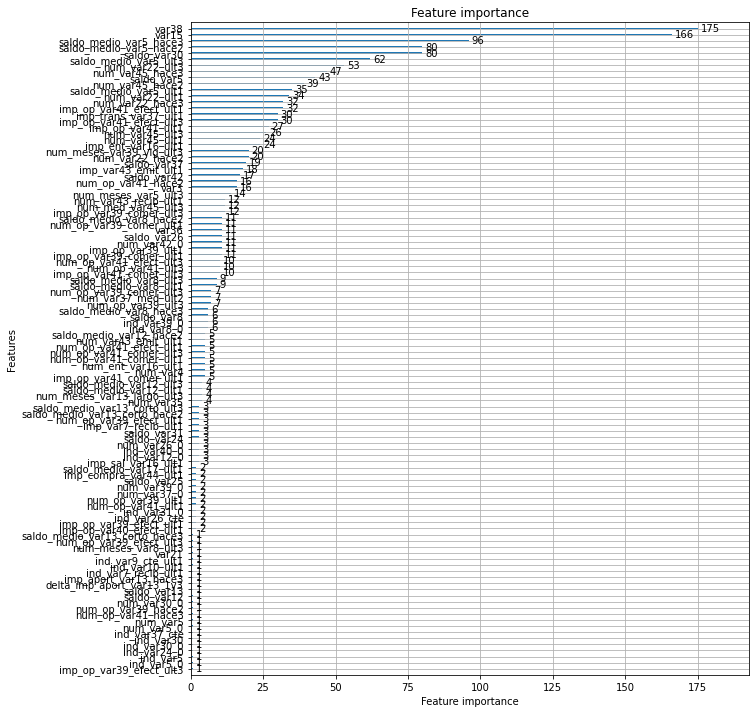

In [103]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf, ax=ax)